<a href="https://colab.research.google.com/github/Prathmeshkangane/Javascript/blob/main/Copy_of_research_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split

from ast import literal_eval

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
arxiv_data = pd.read_csv("arxiv_data.csv")

# New section

In [ ]:
arxiv_data.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [ ]:
arxiv_data.shape

(51774, 3)

In [ ]:
arxiv_data.isnull().sum()

,0
titles,0
summaries,0
terms,0


In [ ]:
arxiv_data.drop(columns = ["terms","summaries"], inplace = True)

In [ ]:
arxiv_data.drop_duplicates(inplace= True)
arxiv_data.reset_index(drop= True,inplace = True)

In [ ]:
pd.set_option('display.max_colwidth', None)
arxiv_data

,titles
0,Survey on Semantic Stereo Matching / Semantic Depth Estimation
1,FUTURE-AI: Guiding Principles and Consensus Recommendations for Trustworthy Artificial Intelligence in Future Medical Imaging
2,Enforcing Mutual Consistency of Hard Regions for Semi-supervised Medical Image Segmentation
3,Parameter Decoupling Strategy for Semi-supervised 3D Left Atrium Segmentation
4,Background-Foreground Segmentation for Interior Sensing in Automotive Industry
...,...
38967,A Ray-based Approach for Boundary Estimation of Fiber Bundles Derived from Diffusion Tensor Imaging
38968,Statistical Denoising for single molecule fluorescence microscopic images
38969,Blinking Molecule Tracking
38970,Towards a Mathematical Foundation of Immunology and Amino Acid Chains


In [ ]:
# prompt: pip install -U -q sentence-transformers

!pip install -U -q sentence-transformers


In [ ]:

!pip install -U -q sentence-transformers

In [ ]:
# This imports the SentenceTransformer class from the Sentence Transformers library.
from sentence_transformers import SentenceTransformer, util
# we load all-MiniLM-L6-v2, which is a MiniLM model fine tuned on a large dataset of over
# 1 billion training pairs.
#This initializes the 'all-MiniLM-L6-v2' model from Sentence Transformers.
# This model is capable of encoding sentences into fixed-size vectors (embeddings).
model = SentenceTransformer('all-MiniLM-L6-v2')
#Our sentences we like to encode
sentences = arxiv_data['titles']
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
embeddings

array([[-3.73324528e-02, -5.35853964e-04, -4.86986935e-02, ...,
         4.00168002e-02, -8.07432830e-03, -1.12721205e-01],
       [-6.75695911e-02, -3.25633511e-02,  2.85481997e-02, ...,
         5.83392084e-02, -2.35455465e-02, -3.87291498e-02],
       [ 3.01970448e-02, -1.08658598e-04,  6.92958608e-02, ...,
         7.74509385e-02, -9.04723331e-02, -3.32056321e-02],
       ...,
       [-5.21420836e-02, -8.82680565e-02, -5.11411391e-02, ...,
        -6.05786853e-02,  5.92942759e-02, -2.94687990e-02],
       [-1.54421804e-02, -7.96080381e-02,  1.47850392e-02, ...,
         1.22725694e-02,  2.37942711e-02, -4.95932437e-02],
       [ 2.12828852e-02, -7.37964511e-02,  6.02626577e-02, ...,
         1.05841145e-01, -3.17206681e-02, -1.08712152e-01]], dtype=float32)

In [ ]:
c = 0
#This loop iterates over pairs of sentences and their corresponding embeddings.
#zip is used to iterate over both lists simultaneously.
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding length:", len(embedding)) # list of floats
    print("")
    # Breaks out of the loop after printing information for the first 5 sentences.
    if c >=5:
        break
    c +=1

Sentence: Survey on Semantic Stereo Matching / Semantic Depth Estimation
Embedding length: 384

Sentence: FUTURE-AI: Guiding Principles and Consensus Recommendations for Trustworthy Artificial Intelligence in Future Medical Imaging
Embedding length: 384

Sentence: Enforcing Mutual Consistency of Hard Regions for Semi-supervised Medical Image Segmentation
Embedding length: 384

Sentence: Parameter Decoupling Strategy for Semi-supervised 3D Left Atrium Segmentation
Embedding length: 384

Sentence: Background-Foreground Segmentation for Interior Sensing in Automotive Industry
Embedding length: 384

Sentence: EdgeFlow: Achieving Practical Interactive Segmentation with Edge-Guided Flow
Embedding length: 384



In [ ]:
import pickle
# Saving sentences and corresponding embeddings
with open('models/embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)

with open('models/sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)

with open('models/rec_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# load save files
embeddings = pickle.load(open('models/embeddings.pkl','rb'))
sentences = pickle.load(open('models/sentences.pkl','rb'))
rec_model = pickle.load(open('models/rec_model.pkl','rb'))

In [ ]:
import torch

def recommendation(input_paper):
    # Calculate cosine similarity scores between the embeddings of input_paper and all papers in the dataset.
    cosine_scores = util.cos_sim(embeddings, rec_model.encode(input_paper))

    # Get the indices of the top-k most similar papers based on cosine similarity.
    top_similar_papers = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

    # Retrieve the titles of the top similar papers.
    papers_list = []
    for i in top_similar_papers.indices:
        papers_list.append(sentences[i.item()])

    return papers_list


In [ ]:
# exampel usage 1: (use this paper as input (Attention is All you Need))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you likemachine 
We recommend to read this paper............
Machine Truth Serum
Reservoir memory machines
Learning to Switch Between Machines and Humans
Support Spinor Machine
Generative Neurosymbolic Machines


In [ ]:
# exampel usage 2: (use this paper as input (BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you likedeep
We recommend to read this paper............
Deep Sets
Deep Forest
Deep Neural Maps
Playing for Depth
On Attribution of Deepfakes


In [ ]:
# exampel usage 3: (use this paper as input (Review of deep learning: concepts, CNN architectures, challenges, applications, future directions))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you likehospital
We recommend to read this paper............
CPAS: the UK's National Machine Learning-based Hospital Capacity Planning System for COVID-19
Student-Teacher Curriculum Learning via Reinforcement Learning: Predicting Hospital Inpatient Admission Location
Ward2ICU: A Vital Signs Dataset of Inpatients from the General Ward
An early prediction of covid-19 associated hospitalization surge using deep learning approach
Forecasting COVID-19 Counts At A Single Hospital: A Hierarchical Bayesian Approach


In [ ]:
arxiv_data.duplicated().sum()

0

In [ ]:
arxiv_data = pd.read_csv("arxiv_data.csv")

In [ ]:
# remove duplicate entries based on the "titles" (terms) column
# This filters the DataFrame, keeping only the rows where the titles are not duplicated.
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")
# There are some terms with occurrence as low as 1.
print(sum(arxiv_data['terms'].value_counts()==1))
# how many unique terms
print(arxiv_data['terms'].nunique())

There are 38972 rows in the deduplicated dataset.
2321
3157


In [ ]:
# getting unique labels
labels_column = arxiv_data['terms'].apply(literal_eval)
labels = labels_column.explode().unique()
print("labels :",labels)
print("lenght :",len(labels))

labels : ['cs.CV' 'cs.LG' 'cs.AI' ... 'I.2.6; I.5.1; G.3'
 '92E10, 46M20, 94A08, 68U10, 44A12, 55R35' '92E10']
lenght : 1099


In [ ]:
arxiv_data_filtered = arxiv_data.groupby('terms').filter(lambda x: len(x) > 1)
arxiv_data_filtered.shape

(36651, 3)

In [ ]:
arxiv_data_filtered['terms'] = arxiv_data_filtered['terms'].apply(lambda x: literal_eval(x))
arxiv_data_filtered['terms'].values[:3]

array([list(['cs.CV', 'cs.LG']), list(['cs.CV', 'cs.AI', 'cs.LG']),
       list(['cs.CV', 'cs.AI'])], dtype=object)

In [ ]:
test_split = 0.1

# Initial train and test split.
# The stratify parameter ensures that the splitting is done in a way that preserves the same distribution of labels (terms) in both the training and test sets.
train_df, test_df = train_test_split(arxiv_data_filtered,test_size=test_split,stratify=arxiv_data_filtered["terms"].values,)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 32985
Number of rows in validation set: 1833
Number of rows in test set: 1833


In [ ]:
# creates a TensorFlow RaggedTensor (terms) from the values in the "terms" column of the train_df DataFrame. A RaggedTensor is a tensor with non-uniform shapes
terms = tf.ragged.constant(train_df['terms'].values)
# This line creates a StringLookup layer in TensorFlow. The purpose of this layer is to map strings to integer indices and vice versa. The output_mode="multi_hot" indicates that the layer will output a multi-hot encoded representation of the input strings.
lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')
# This step adapts the StringLookup layer to the unique values in the "terms" column, building the vocabulary.
lookup.adapt(terms)
# retrieve vocabulary
vocab = lookup.get_vocabulary()

print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'eess.IV', 'cs.RO', 'cs.CL', 'cs.NE', 'cs.CR', 'math.OC', 'eess.SP', 'cs.GR', 'cs.SI', 'cs.MM', 'cs.SY', 'cs.IR', 'cs.MA', 'eess.SY', 'cs.HC', 'cs.DC', 'math.IT', 'cs.IT', 'cs.CY', 'stat.AP', 'stat.TH', 'math.ST', 'stat.ME', 'eess.AS', 'cs.SD', 'q-bio.QM', 'q-bio.NC', 'cs.DS', 'cs.GT', 'cs.CG', 'cs.NI', 'cs.SE', 'I.2.6', 'stat.CO', 'math.NA', 'cs.NA', 'physics.chem-ph', 'cs.DB', 'q-bio.BM', 'cs.LO', 'cond-mat.dis-nn', '68T45', 'math.PR', 'cs.PL', 'physics.comp-ph', 'I.2.10', 'cs.CE', 'cs.AR', 'q-fin.ST', 'cond-mat.stat-mech', 'math.DS', '68T05', 'quant-ph', 'physics.data-an', 'cs.CC', 'I.4.6', 'physics.soc-ph', 'physics.ao-ph', 'cs.DM', 'econ.EM', 'q-bio.GN', 'physics.med-ph', 'cs.PF', 'astro-ph.IM', 'I.4.8', 'math.AT', 'I.4', 'q-fin.TR', 'cs.FL', 'I.5.4', 'I.2', '68U10', 'hep-ex', '68T10', 'physics.optics', 'physics.geo-ph', 'cond-mat.mtrl-sci', 'q-fin.CP', 'physics.flu-dyn', 'math.CO', 'math.AP', 'I.4; I.5', 'I.4.9', 'I.2.6

In [ ]:
sample_label = train_df["terms"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['cs.CV']
Label-binarized representation: [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]]


In [ ]:
#max_seqlen: Maximum sequence length. It indicates the maximum length allowed for sequences.
max_seqlen = 150
#batch_size: Batch size. It specifies the number of samples to use in each iteration.
batch_size = 20
#padding_token: A token used for padding sequences.
padding_token = "<pad>"
#auto = tf.data.AUTOTUNE: auto is assigned the value tf.data.AUTOTUNE,
auto = tf.data.AUTOTUNE

def make_dataset(dataframe, is_train=True):
    # creating sequences of labesls
    labels = tf.ragged.constant(dataframe["terms"].values)
    #This line uses the previously defined lookup layer to convert the ragged tensor of labels into a binarized representation. The resulting label_binarized is a NumPy array.
    label_binarized = lookup(labels).numpy()
    # creating sequences of text.
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["summaries"].values, label_binarized))
    # shuffling data basis on condition
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [ ]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [ ]:
def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)

In [ ]:
def predict_category(abstract, model, vectorizer, label_lookup):
    # Preprocess the abstract using the loaded text vectorizer
    preprocessed_abstract = vectorizer([abstract])

    # Make predictions using the loaded model
    predictions = model.predict(preprocessed_abstract)

    # Convert predictions to human-readable labels
    predicted_labels = label_lookup(np.round(predictions).astype(int)[0])

    return predicted_labels

In [ ]:
text_batch, label_batch = next(iter(train_dataset))
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

Abstract: b'Recent approaches for modelling dynamics of physical systems with neural\nnetworks enforce Lagrangian or Hamiltonian structure to improve prediction and\ngeneralization. However, when coordinates are embedded in high-dimensional data\nsuch as images, these approaches either lose interpretability or can only be\napplied to one particular example. We introduce a new unsupervised neural\nnetwork model that learns Lagrangian dynamics from images, with\ninterpretability that benefits prediction and control. The model infers\nLagrangian dynamics on generalized coordinates that are simultaneously learned\nwith a coordinate-aware variational autoencoder (VAE). The VAE is designed to\naccount for the geometry of physical systems composed of multiple rigid bodies\nin the plane. By inferring interpretable Lagrangian dynamics, the model learns\nphysical system properties, such as kinetic and potential energy, which enables\nlong-term prediction of dynamics in the image space and synthe

In [ ]:
vocabulary = set()
train_df["summaries"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

153754


In [ ]:
text_vectorizer = layers.TextVectorization(max_tokens=20000,ngrams=2,output_mode="tf_idf")
# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
train_dataset = train_dataset.map(lambda text, label: (text_vectorizer(text), label)).prefetch(auto)
validation_dataset = validation_dataset.map(lambda text, label: (text_vectorizer(text), label)).prefetch(auto)
test_dataset = test_dataset.map(lambda text, label: (text_vectorizer(text), label),).prefetch(auto)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import StringLookup

In [ ]:
# creating shallow_mlp_model  (MLP)
from tensorflow.keras.callbacks import EarlyStopping

# Creating shallow_mlp_model (MLP) with dropout layers
model1 = keras.Sequential([
    # First hidden layer: 512 neurons, ReLU activation function, with dropout.
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),  # Adding dropout for regularization.


    # Output layer: The number of neurons equals the vocabulary size (output vocabulary of the StringLookup layer), with a sigmoid activation function.
    layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
])

# Compile the model
model1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])

# Add early stopping
# Number of epochs with no improvement after which training will be stopped.
# Restore weights from the epoch with the best value of the monitored quantity.
early_stopping = EarlyStopping(patience=5,restore_best_weights=True)

# Train the model
# Add early stopping callback.verbose=1
history = model1.fit(train_dataset,validation_data=validation_dataset,epochs=6,callbacks=[early_stopping])

Epoch 1/6
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 851s 515ms/step - binary_accuracy: 0.9560 - loss: 0.1082 - val_binary_accuracy: 0.9942 - val_loss: 0.0204
Epoch 2/6
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 858s 520ms/step - binary_accuracy: 0.9938 - loss: 0.0226 - val_binary_accuracy: 0.9942 - val_loss: 0.0196
Epoch 3/6
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 866s 525ms/step - binary_accuracy: 0.9941 - loss: 0.0202 - val_binary_accuracy: 0.9943 - val_loss: 0.0193
Epoch 4/6
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 908s 516ms/step - binary_accuracy: 0.9944 - loss: 0.0187 - val_binary_accuracy: 0.9942 - val_loss: 0.0193
Epoch 5/6
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 864s 524ms/step - binary_accuracy: 0.9946 - loss: 0.0175 - val_binary_accuracy: 0.9942 - val_loss: 0.0194
Epoch 6/6
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 865s 524ms/step - binary_accuracy: 0.9948 - loss: 0.0162 - val_binary_accuracy: 0.9942 - val_loss: 0.0205


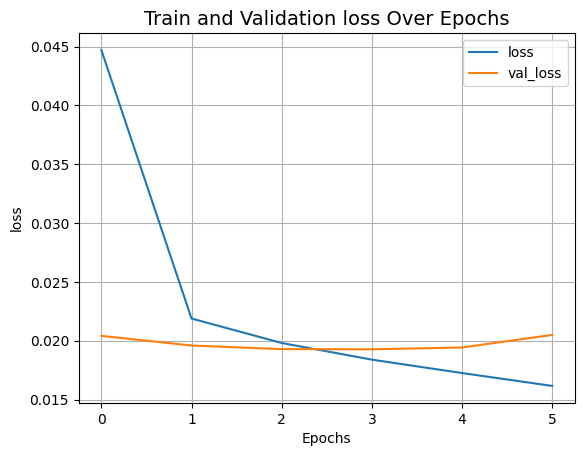

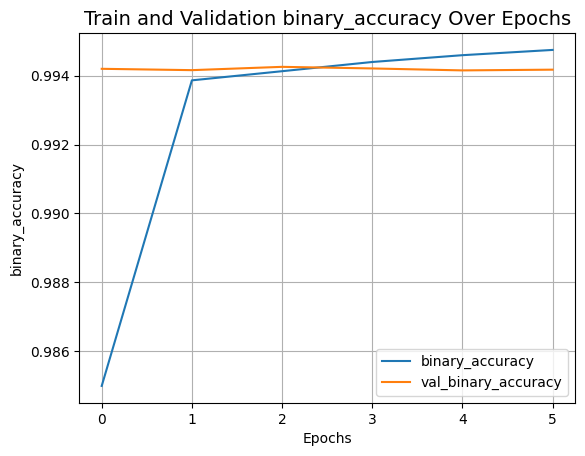

In [ ]:
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

In [ ]:
# model evaltuation on test and val dataset
_, binary_acc1 = model1.evaluate(test_dataset)
_, binary_acc2 = model1.evaluate(validation_dataset)

print(f"Categorical accuracy on the test set: {round(binary_acc1 * 100, 2)}%.")
print(f"Categorical accuracy on the validation set: {round(binary_acc2 * 100, 2)}%.")

92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 483ms/step - binary_accuracy: 0.9942 - loss: 0.0198
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 486ms/step - binary_accuracy: 0.9943 - loss: 0.0186
Categorical accuracy on the test set: 99.39%.
Categorical accuracy on the validation set: 99.42%.


In [ ]:
# Save the model
model1.save("models/model.h5")

# Save the configuration of the text vectorizer
saved_text_vectorizer_config = text_vectorizer.get_config()
with open("models/text_vectorizer_config.pkl", "wb") as f:
    pickle.dump(saved_text_vectorizer_config, f)


# Save the vocabulary
with open("models/vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

In [ ]:
# Prepare your input text
input_text = ["Graph neural networks (GNNs) have been widely used to learn vector\nrepresentation of graph-structured data and achieved better task performance\nthan conventional methods. The foundation of GNNs is the message passing\nprocedure, which propagates the information in a node to its neighbors. Since\nthis procedure proceeds one step per layer, the range of the information\npropagation among nodes is small in the lower layers, and it expands toward the\nhigher layers. Therefore, a GNN model has to be deep enough to capture global\nstructural information in a graph. On the other hand, it is known that deep GNN\nmodels suffer from performance degradation because they lose nodes' local\ninformation, which would be essential for good model performance, through many\nmessage passing steps. In this study, we propose multi-level attention pooling\n(MLAP) for graph-level classification tasks, which can adapt to both local and\nglobal structural information in a graph. It has an attention pooling layer for\neach message passing step and computes the final graph representation by\nunifying the layer-wise graph representations. The MLAP architecture allows\nmodels to utilize the structural information of graphs with multiple levels of\nlocalities because it preserves layer-wise information before losing them due\nto oversmoothing. Results of our experiments show that the MLAP architecture\nimproves the graph classification performance compared to the baseline\narchitectures. In addition, analyses on the layer-wise graph representations\nsuggest that aggregating information from multiple levels of localities indeed\nhas the potential to improve the discriminability of learned graph\nrepresentations."]
vectorized_text = text_vectorizer(input_text)

In [ ]:
# Prepare your input sentences
sentences = ["Your input text here"]

# Get the embeddings
embeddings = model.encode(sentences)

print(embeddings)

[[ 9.10684541e-02 -6.54331222e-03 -4.81941998e-02  1.54552180e-02
  -7.96055794e-03  5.62628452e-03  3.31243761e-02  5.48345000e-02
   9.48888659e-02 -2.35634372e-02  3.65550444e-02 -3.11597697e-02
   1.34870820e-02 -1.27536329e-02 -1.13641061e-02  3.22063677e-02
   1.21592432e-02 -6.25584647e-02 -1.34980530e-01 -9.67495963e-02
  -3.09267957e-02  5.69839068e-02 -6.90212399e-02  6.08292315e-03
  -1.09188884e-01  7.75142759e-02 -3.18693519e-02  5.80653511e-02
   1.50924670e-02 -1.90909766e-02 -1.09782524e-01  1.22392951e-02
   1.49997652e-01  1.78861115e-02  1.72142778e-02 -5.06686755e-02
  -4.15916145e-02 -1.08418539e-02 -3.10023986e-02 -4.87000346e-02
  -2.47970521e-02 -1.71810150e-01  1.97630636e-02 -2.91505679e-02
   5.35954209e-03 -5.68931885e-02 -3.70458290e-02 -4.34737727e-02
   6.23897538e-02  8.07764977e-02 -6.08622283e-02 -6.28203377e-02
  -7.87253398e-03  3.70909274e-02 -3.62491645e-02  6.65999427e-02
   2.06187107e-02 -4.57123369e-02  2.84682959e-02 -4.43662964e-02
   5.77919

In [ ]:
from tensorflow import keras
import pickle

# Load the model
loaded_model = keras.models.load_model("models/model.h5")

from tensorflow.keras.layers import TextVectorization

# Load the configuration of the text vectorizer
with open("models/text_vectorizer_config.pkl", "rb") as f:
    saved_text_vectorizer_config = pickle.load(f)

# Create a new TextVectorization layer with the saved configuration
loaded_text_vectorizer = TextVectorization.from_config(saved_text_vectorizer_config)

# Load the saved weights into the new TextVectorization layer
with open("models/text_vectorizer_weights.pkl", "rb") as f:
    weights = pickle.load(f)
    loaded_text_vectorizer.set_weights(weights)


ValueError: You called `set_weights(weights)` on layer 'text_vectorization' with a weight list of length 3, but the layer was expecting 0 weights.

In [ ]:
# Load the vocabulary
with open("models/vocab.pkl", "rb") as f:
    loaded_vocab = pickle.load(f)


In [ ]:
# Example usage
new_abstract = "Graph neural networks (GNNs) have been widely used to learn vector\nrepresentation of graph-structured data and achieved better task performance\nthan conventional methods. The foundation of GNNs is the message passing\nprocedure, which propagates the information in a node to its neighbors. Since\nthis procedure proceeds one step per layer, the range of the information\npropagation among nodes is small in the lower layers, and it expands toward the\nhigher layers. Therefore, a GNN model has to be deep enough to capture global\nstructural information in a graph. On the other hand, it is known that deep GNN\nmodels suffer from performance degradation because they lose nodes' local\ninformation, which would be essential for good model performance, through many\nmessage passing steps. In this study, we propose multi-level attention pooling\n(MLAP) for graph-level classification tasks, which can adapt to both local and\nglobal structural information in a graph. It has an attention pooling layer for\neach message passing step and computes the final graph representation by\nunifying the layer-wise graph representations. The MLAP architecture allows\nmodels to utilize the structural information of graphs with multiple levels of\nlocalities because it preserves layer-wise information before losing them due\nto oversmoothing. Results of our experiments show that the MLAP architecture\nimproves the graph classification performance compared to the baseline\narchitectures. In addition, analyses on the layer-wise graph representations\nsuggest that aggregating information from multiple levels of localities indeed\nhas the potential to improve the discriminability of learned graph\nrepresentations."
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)


FailedPreconditionError: Exception encountered when calling TextVectorization.call().

[1m{{function_node __wrapped__LookupTableFindV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Table not initialized. [Op:LookupTableFindV2] name: [0m

Arguments received by TextVectorization.call():
  • inputs=['"Graph neural networks (GNNs) have been widely used to learn vector\\nrepresentation of graph-structured data and achieved better task performance\\nthan conventional methods. The foundation of GNNs is the message passing\\nprocedure, which propagates the information in a node to its neighbors. Since\\nthis procedure proceeds one step per layer, the range of the information\\npropagation among nodes is small in the lower layers, and it expands toward the\\nhigher layers. Therefore, a GNN model has to be deep enough to capture global\\nstructural information in a graph. On the other hand, it is known that deep GNN\\nmodels suffer from performance degradation because they lose nodes\' local\\ninformation, which would be essential for good model performance, through many\\nmessage passing steps. In this study, we propose multi-level attention pooling\\n(MLAP) for graph-level classification tasks, which can adapt to both local and\\nglobal structural information in a graph. It has an attention pooling layer for\\neach message passing step and computes the final graph representation by\\nunifying the layer-wise graph representations. The MLAP architecture allows\\nmodels to utilize the structural information of graphs with multiple levels of\\nlocalities because it preserves layer-wise information before losing them due\\nto oversmoothing. Results of our experiments show that the MLAP architecture\\nimproves the graph classification performance compared to the baseline\\narchitectures. In addition, analyses on the layer-wise graph representations\\nsuggest that aggregating information from multiple levels of localities indeed\\nhas the potential to improve the discriminability of learned graph\\nrepresentations."']

In [ ]:
# Example usage
new_abstract = 'Deep networks and decision forests (such as random forests and gradient\nboosted trees) are the leading machine learning methods for structured and\ntabular data, respectively. Many papers have empirically compared large numbers\nof classifiers on one or two different domains (e.g., on 100 different tabular\ndata settings). However, a careful conceptual and empirical comparison of these\ntwo strategies using the most contemporary best practices has yet to be\nperformed. Conceptually, we illustrate that both can be profitably viewed as\n"partition and vote" schemes. Specifically, the representation space that they\nboth learn is a partitioning of feature space into a union of convex polytopes.\nFor inference, each decides on the basis of votes from the activated nodes.\nThis formulation allows for a unified basic understanding of the relationship\nbetween these methods. Empirically, we compare these two strategies on hundreds\nof tabular data settings, as well as several vision and auditory settings. Our\nfocus is on datasets with at most 10,000 samples, which represent a large\nfraction of scientific and biomedical datasets. In general, we found forests to\nexcel at tabular and structured data (vision and audition) with small sample\nsizes, whereas deep nets performed better on structured data with larger sample\nsizes. This suggests that further gains in both scenarios may be realized via\nfurther combining aspects of forests and networks. We will continue revising\nthis technical report in the coming months with updated results.'
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)